# Introduction to Sequential Parameter Optimization
## Noise

* This notebook demonstrates how noisy functions can be handled by `Spot`.

## 1 Example: `Spot` and the Noisy Sphere Function

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### The Objective Function: Noisy Sphere

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function with noise, i.e., a function that can be described by a (closed) formula:
   $$f(x) = x^2 + \epsilon$$

* Since `sigma` is set to `0.1`, noise is added to the function:

In [2]:
fun = analytical().fun_sphere
fun_control = {"sigma": 0.1,
               "seed": 123}

* A plot illustrates the noise:

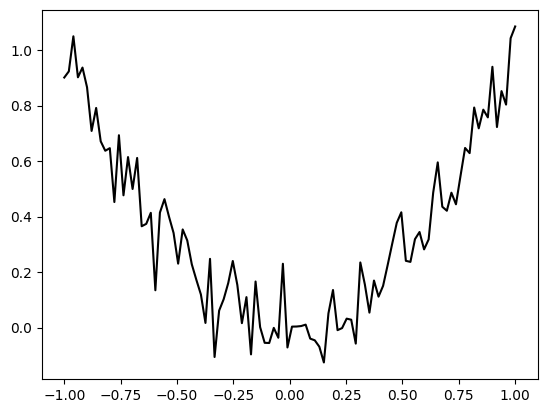

In [3]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x, fun_control=fun_control)
plt.figure()
plt.plot(x,y, "k")
plt.show()

`Spot` is adopted as follows to cope with noisy functions:

1. `fun_repeats` is set to a value larger than 1 (here: 2)
2. `noise` is set to `true`. Therefore, a nugget (`Lambda`) term is added to the correlation matrix
3.  `init size` (of the `design_control` dictionary) is set to a value larger than 1 (here: 2)

In [4]:
spot_1_noisy = spot.Spot(fun=fun,
                   lower = np.array([-1]),
                   upper = np.array([1]),
                   fun_evals = 10,
                   fun_repeats = 2,
                   noise = True,
                   seed=123,
                   show_models=True,
                   fun_control = fun_control,
                   design_control={"init_size": 3,
                                   "repeats": 2},
                   surrogate_control={"noise": True})

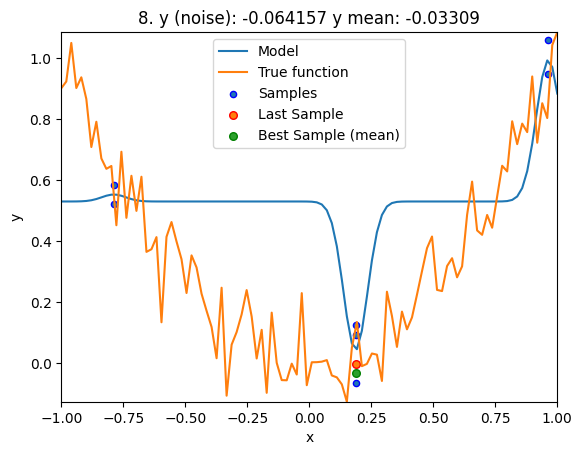

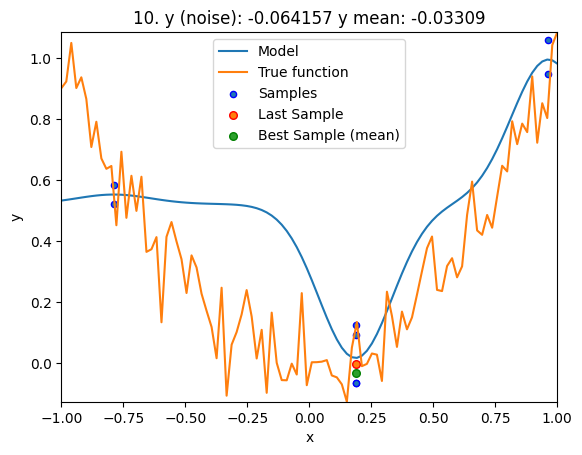

In [5]:
spot_1_noisy.run()

## Print the Results

In [6]:
spot_1_noisy.print_results()

min y: -0.06415721592502649
x0: 0.18642671243617048
min mean y: -0.033090480981028104


AttributeError: 'Spot' object has no attribute 'self'

In [ ]:
spot_1_noisy.plot_progress(log_y=False)

# 2 Noise and Surrogates: The Nugget Effect

## 2.1 The Noisy Sphere

### The Data

* We prepare some data first:

In [ ]:
import numpy as np
import spotPython
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.design.spacefilling import spacefilling
from spotPython.build.kriging import Kriging
import matplotlib.pyplot as plt

gen = spacefilling(1)
rng = np.random.RandomState(1)
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_sphere
fun_control = {"sigma": 2,
               "seed": 125}
X = gen.scipy_lhd(10, lower=lower, upper = upper)
y = fun(X, fun_control=fun_control)
X_train = X.reshape(-1,1)
y_train = y


* A surrogate without nugget is fitted to these data:

In [ ]:
S = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=False)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression on noisy dataset")

* In comparison to the surrogate without nugget, we fit a surrogate with nugget to the data:

In [ ]:
S_nug = Kriging(name='kriging',
            seed=123,
            log_level=50,
            n_theta=1,
            noise=True)
S_nug.fit(X_train, y_train)
X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S_nug.predict(X_axis, return_val="all")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression with nugget on noisy dataset")

* The value of the nugget term can be extracted from the model as follows:

In [ ]:
S.Lambda

In [ ]:
S_nug.Lambda

* We see:
    * the first model `S` has no nugget, 
    * whereas the second model has a nugget value (`Lambda`) larger than zero.

# Exercises

* Important:
    * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
    * Please combine your results using this notebook.
    * Only one notebook from each group!
    * Presentation is based on this notebook. No addtional slides are required!
    * spotPython version `0.16.11` (or greater) is required (see http://www.gm.fh-koeln.de/~bartz/site/download/)

## Exercise 1

* Each team member should choose one of the following optimization algorithms.
* Please add your name to the section title!

### 1. Noisy `fun_cubed`

* Analyse the effect of noise on the `fun_cubed` function with the following settings:


In [ ]:
fun = analytical().fun_cubed
fun_control = {"sigma": 10,
               "seed": 123}
lower = np.array([-10])
upper = np.array([10])

### 2. `fun_runge`

* Analyse the effect of noise on the `fun_runge` function with the following settings:

In [ ]:
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_runge
fun_control = {"sigma": 0.25,
               "seed": 123}


### 3. `fun_forrester`

* Analyse the effect of noise on the `fun_forrester` function with the following settings: 


In [ ]:
lower = np.array([0])
upper = np.array([1])
fun = analytical().fun_forrester
fun_control = {"sigma": 5,
               "seed": 123}


### 4. `fun_xsin`

* Analyse the effect of noise on the `fun_xsin` function with the following settings: 

In [ ]:
lower = np.array([-1.])
upper = np.array([1.])
fun = analytical().fun_xsin
fun_control = {"sigma": 0.5,
               "seed": 123}